<a href="https://colab.research.google.com/github/DhanuEdu/DATA-ANALYST-TRAINING--UNIFIED-MENTOR/blob/main/coffee_sales_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()
#Colab does not store files permanently so I have used the above

Saving index.csv to index.csv


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import pandas as pd


# Load the dataset
coffee_data = pd.read_csv('index.csv')

print(coffee_data.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [5]:
#handling missing values
# Fill missing categorical values with the mode

coffee_data['money'].fillna(coffee_data['money'].median(), inplace=True)


coffee_data['cash_type'].fillna(coffee_data['cash_type'].mode()[0], inplace=True)
coffee_data['coffee_name'].fillna(coffee_data['coffee_name'].mode()[0], inplace=True)

<ipython-input-5-e4ec79e73156>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coffee_data['money'].fillna(coffee_data['money'].median(), inplace=True)
<ipython-input-5-e4ec79e73156>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [28]:
#converting data types
coffee_data['date'] = pd.to_datetime(coffee_data['date'])
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Check data types
print(coffee_data.dtypes)

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


In [6]:
# Check for duplicates
print("Duplicate Rows:", coffee_data.duplicated().sum())

# Remove duplicates if any
coffee_data.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [40]:
import pandas as pd

# Convert 'date' and 'datetime' columns to datetime format (if they exist)
if 'date' in data.columns:
    coffee_data['date'] = pd.to_datetime(coffee_data['date'])

if 'datetime' in data.columns:
    coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Convert 'money' column to float (if it's not already)
if coffee_data['money'].dtype != 'float64':
    coffee_data['money'] = coffee_data['money'].astype(float)


print(coffee_data.dtypes)


date           datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
Month                   int32
Year                    int32
Day_of_Week             int32
Hour                    int32
Week                   UInt32
dtype: object


In [41]:
#removing outliers

import numpy as np
from scipy.stats import zscore

# Calculate Z-score for the 'money' column
coffee_data['Z_score'] = np.abs(zscore(coffee_data['money']))

# Keep only rows where Z-score is less than 3 (i.e., not an outlier)
coffee_data = coffee_data[coffee_data['Z_score'] < 3]

# Drop the 'Z_score' column (not needed anymore)
coffee_data.drop(columns=['Z_score'], inplace=True)

# Display dataset after removing outliers
print("Dataset after outlier removal:")
print(coffee_data.describe())


Dataset after outlier removal:
                                date        money        Month    Year  \
count                           1133  1133.000000  1133.000000  1133.0   
mean   2024-05-19 11:36:29.232127232    33.105808     5.082083  2024.0   
min              2024-03-01 00:00:00    18.120000     3.000000  2024.0   
25%              2024-04-14 00:00:00    28.900000     4.000000  2024.0   
50%              2024-05-23 00:00:00    32.820000     5.000000  2024.0   
75%              2024-06-22 00:00:00    37.720000     6.000000  2024.0   
max              2024-07-31 00:00:00    40.000000     7.000000  2024.0   
std                              NaN     5.035366     1.390073     0.0   

       Day_of_Week         Hour       Week  
count  1133.000000  1133.000000     1133.0  
mean      2.943513    14.552515  20.505737  
min       0.000000     7.000000        9.0  
25%       1.000000    11.000000       15.0  
50%       3.000000    14.000000       21.0  
75%       5.000000    18.000000 

In [46]:
#feature engineering
# Extract month and year from the 'datetime' column

# Check data types
print(coffee_data.dtypes)

# Check if the 'datetime' column exists before proceeding
if 'datetime' in coffee_data.columns:
    #converting data types if the column exists
    coffee_data['date'] = pd.to_datetime(coffee_data['date'])
    coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

    coffee_data['Month'] = coffee_data['datetime'].dt.month
    coffee_data['Year'] = coffee_data['datetime'].dt.year

    # Extract day of the week (0=Monday, 6=Sunday)
    coffee_data['Day_of_Week'] = coffee_data['datetime'].dt.dayofweek

    # Extract hour of the transaction
    coffee_data['Hour'] = coffee_data['datetime'].dt.hour

    # Drop the original 'datetime' column if not needed
    coffee_data.drop(columns=['datetime'], inplace=True)


date           datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
Month                   int32
Year                    int32
Day_of_Week             int32
Hour                    int32
Week                   UInt32
dtype: object


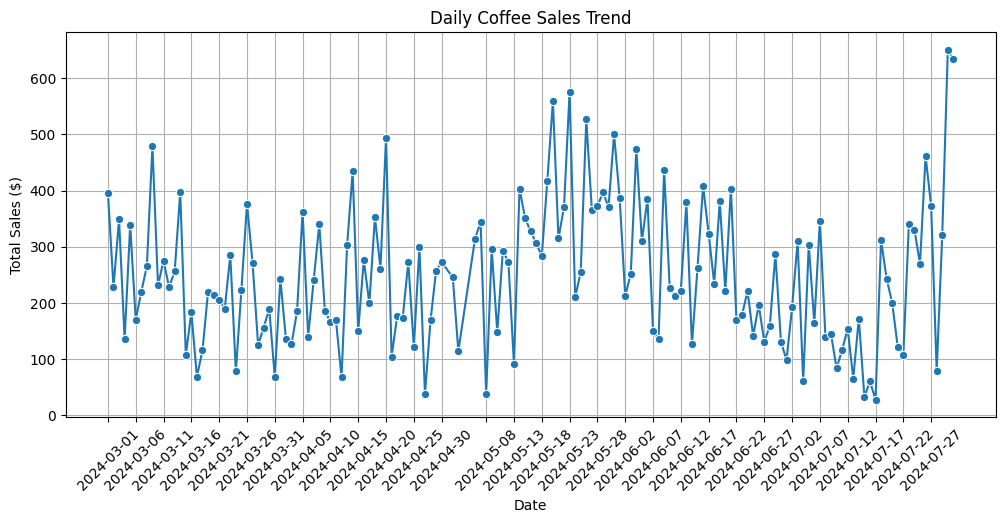

In [86]:
#EDA- daily

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by date to see daily sales trend
daily_sales = coffee_data.groupby('date')['money'].sum().reset_index()

# Plot daily sales trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o', linestyle='-')

plt.title("Daily Coffee Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")

plt.xticks(daily_sales['date'][::5], rotation=45)

plt.grid(True)
plt.show()


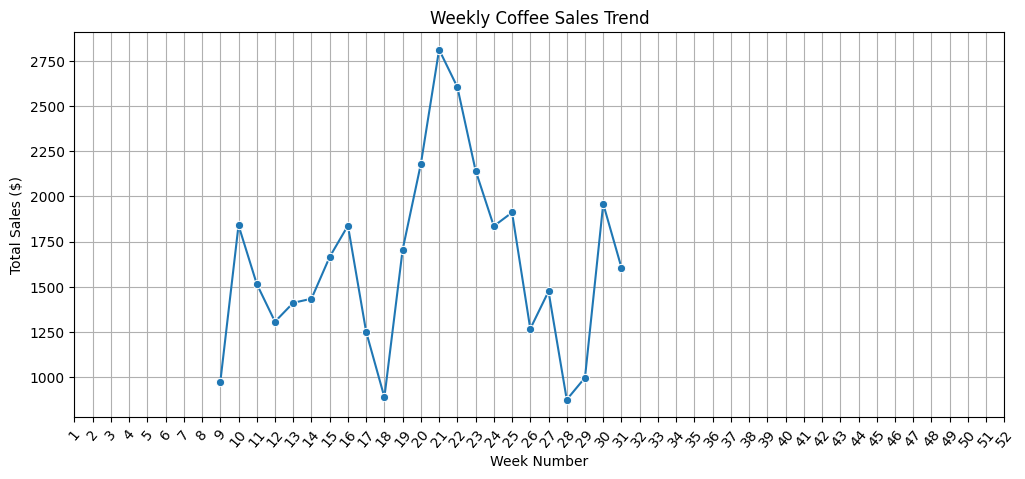

In [87]:
#EDA- weekly

import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and week number from date
coffee_data['Year'] = coffee_data['date'].dt.year
coffee_data['Week'] = coffee_data['date'].dt.isocalendar().week

# Group by year and week to see weekly sales trend
weekly_sales = coffee_data.groupby(['Year', 'Week'])['money'].sum().reset_index()

# Plot weekly sales trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_sales, x='Week', y='money', marker='o', linestyle='-')

plt.title("Weekly Coffee Sales Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Sales ($)")
plt.xticks(range(1, 53), rotation=50)  # Fix x-ticks to show correct week numbers
plt.grid(True)
plt.show()


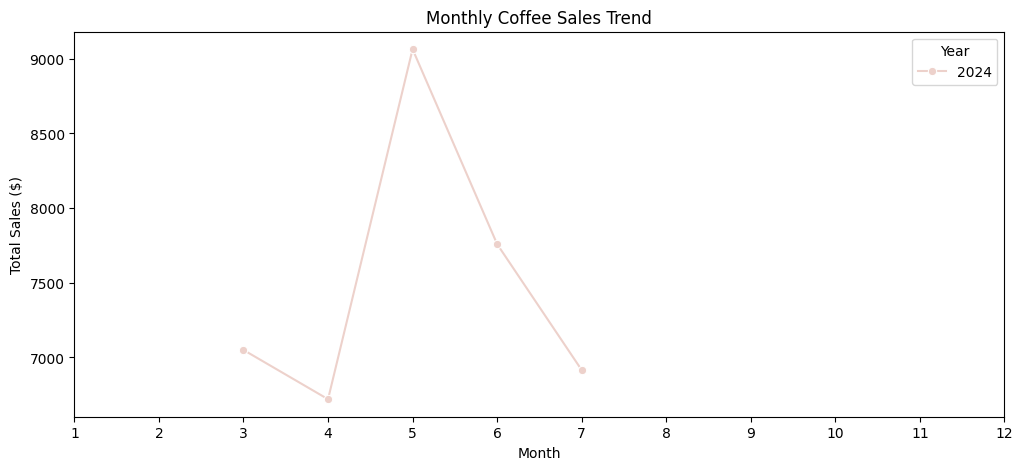

In [82]:
#month
# Group by month to see monthly sales trend
monthly_sales = coffee_data.groupby(['Year', 'Month'])['money'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='money', hue='Year', marker='o')
plt.title("Monthly Coffee Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(range(1, 13))
plt.show()


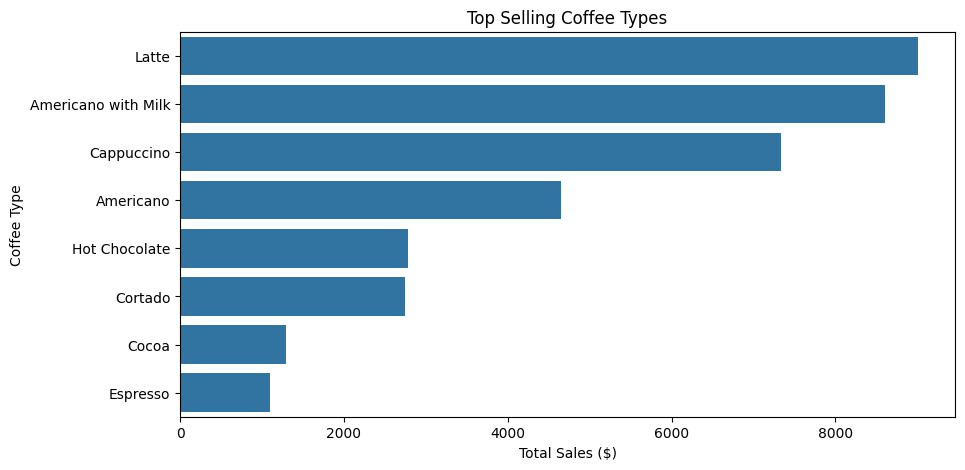

In [80]:
#coffee type
# Group sales by coffee type
coffee_sales = data.groupby('coffee_name')['money'].sum().reset_index()

# Plot sales by coffee type
plt.figure(figsize=(10, 5))
sns.barplot(data=coffee_sales, x='money', y='coffee_name', order=coffee_sales.sort_values('money', ascending=False)['coffee_name'])
plt.title("Top Selling Coffee Types")
plt.xlabel("Total Sales ($)")
plt.ylabel("Coffee Type")
plt.show()


In [91]:
#machine learning

from sklearn.model_selection import train_test_split
# Use correct column names: 'Month', 'Day_of_Week', 'Hour'
X = coffee_data[['Month', 'Day_of_Week', 'Hour']]
y = coffee_data['money']
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Display dataset shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (906, 3), (906,)
Test set shape: (227, 3), (227,)


In [93]:
#training a simple model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 19.156491144214325
R^2 Score: -0.029007582233382845


In [95]:
#model interpretation and conclusion
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Month          -1.214082
Day_of_Week     0.079544
Hour            0.195328
